## Librairies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_train = pd.read_csv('/content/customer_churn_dataset.csv')

In [ ]:
df_train.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [ ]:
df1 = df_train.copy()

In [ ]:
df1.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

## Data Preprocessing

In [ ]:
df1.columns = [col.replace(' ','_') for col in df1.columns]
df1.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage_Frequency',
       'Support_Calls', 'Payment_Delay', 'Subscription_Type',
       'Contract_Length', 'Total_Spend', 'Last_Interaction', 'Churn'],
      dtype='object')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage_Frequency    440832 non-null  float64
 5   Support_Calls      440832 non-null  float64
 6   Payment_Delay      440832 non-null  float64
 7   Subscription_Type  440832 non-null  object 
 8   Contract_Length    440832 non-null  object 
 9   Total_Spend        440832 non-null  float64
 10  Last_Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


**There are 12 columns in the dataset : 11 features (predictor variables) and 1 target.**

In [ ]:
df1.describe()

,CustomerID,Age,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Total_Spend,Last_Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


<Axes: >

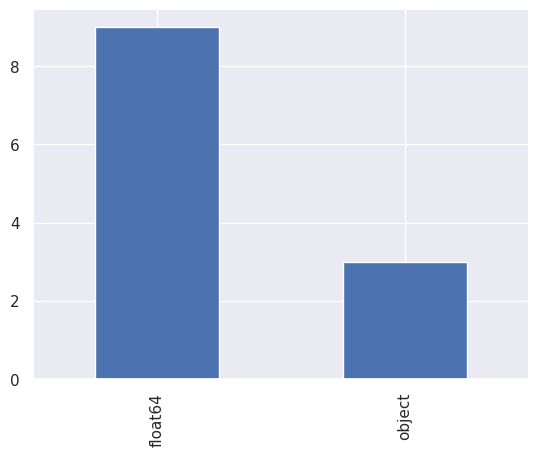

In [ ]:
df1.dtypes.value_counts().plot.bar()

**There are only two types of data : numerical (float) and categorical (object).**

In [ ]:
df1.drop('CustomerID', axis=1, inplace=True)

**We remove the CustomerID column because it is not useful for the prediction.**

### Handling the missing values

In [ ]:
df1.isna().sum()

,0
Age,1
Gender,1
Tenure,1
Usage_Frequency,1
Support_Calls,1
Payment_Delay,1
Subscription_Type,1
Contract_Length,1
Total_Spend,1
Last_Interaction,1


**There is only one missing value in each feature, probably the same row in the dataset.**

In [ ]:
df1.dropna(inplace=True)

**We drop missing value and we see that there was only one missing row in the dataset.**

### Handling for Duplicates

In [ ]:
df1.duplicated().sum()

0

**There are no duplicates in the dataset.**

### Handling for Outliers

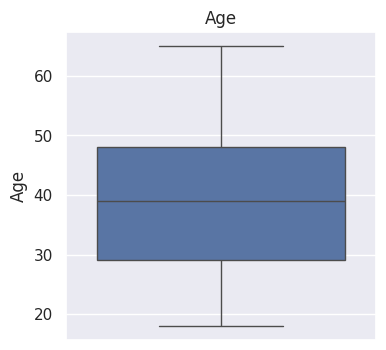

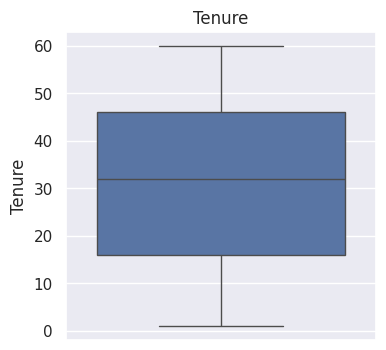

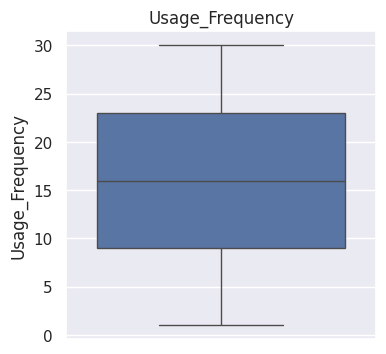

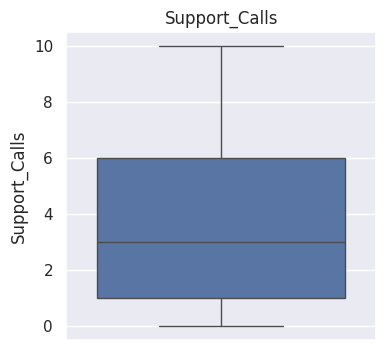

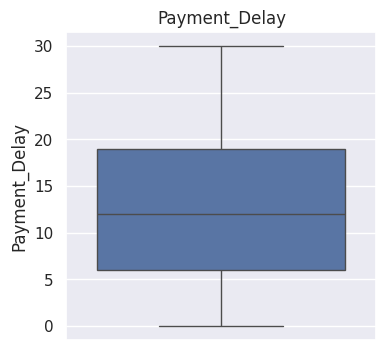

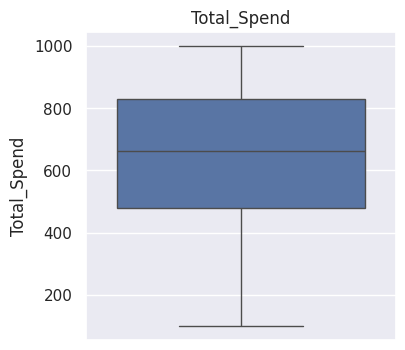

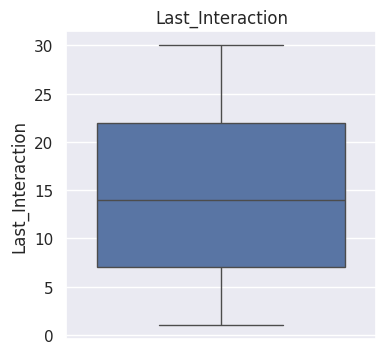

In [ ]:
numerical_features = df1.select_dtypes('float').drop('Churn', axis=1)

for feature in numerical_features:
    plt.figure(figsize=(4,4))
    sns.boxplot(df1[feature])
    plt.title(feature)
    plt.show()

**There are no outliers and anomalies in numerical features.**

### Categorical Encoding

In [ ]:
categorical_features = df1.select_dtypes('object').columns.tolist()
categorical_features

['Gender', 'Subscription_Type', 'Contract_Length']

<Axes: xlabel='Gender'>

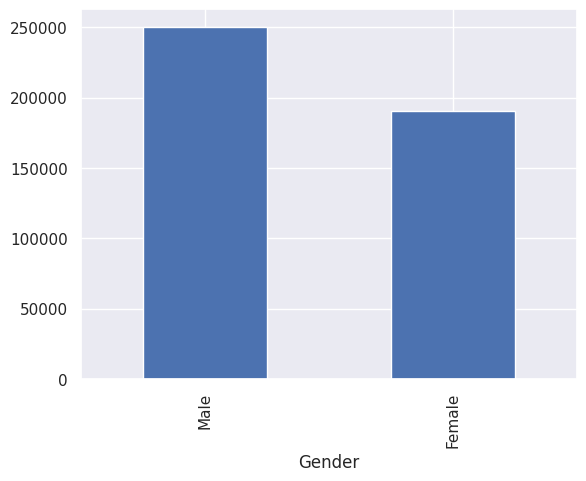

In [ ]:
df1['Gender'].value_counts().plot.bar()

<Axes: xlabel='Subscription_Type'>

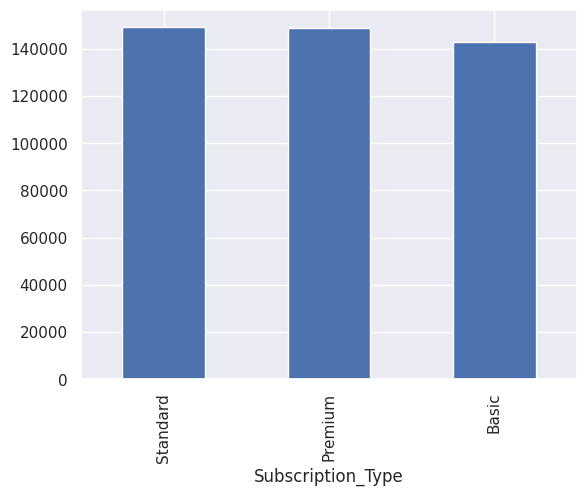

In [ ]:
df1['Subscription_Type'].value_counts().plot.bar()

<Axes: xlabel='Contract_Length'>

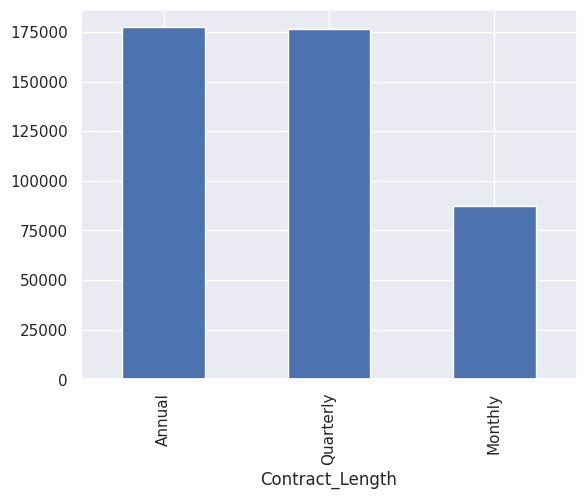

In [ ]:
df1['Contract_Length'].value_counts().plot.bar()

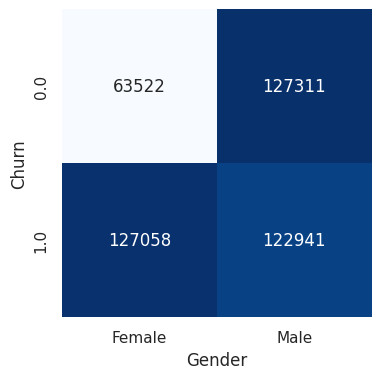

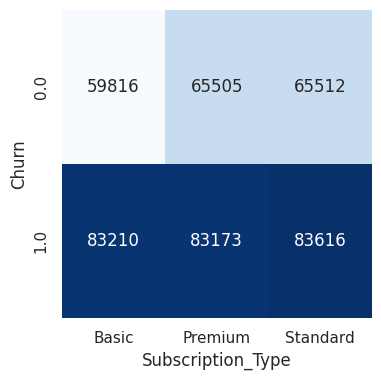

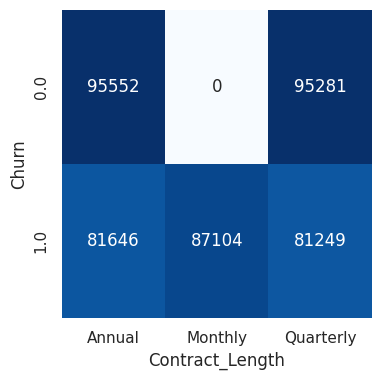

In [ ]:
for feature in categorical_features:
    plt.figure(figsize=(4,4))
    sns.heatmap(pd.crosstab(df1['Churn'], df1[feature]), cmap='Blues', cbar=None, annot=True, fmt='d')

In [ ]:
df1 = pd.get_dummies(df1, columns=categorical_features, drop_first=True, dtype='int')

In [ ]:
df1 = df1[['Age', 'Tenure', 'Usage_Frequency', 'Support_Calls', 'Payment_Delay',
       'Total_Spend', 'Last_Interaction','Gender_Male',
       'Subscription_Type_Premium', 'Subscription_Type_Standard',
       'Contract_Length_Monthly', 'Contract_Length_Quarterly', 'Churn']]

In [ ]:
df1.head()

,Age,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Total_Spend,Last_Interaction,Gender_Male,Subscription_Type_Premium,Subscription_Type_Standard,Contract_Length_Monthly,Contract_Length_Quarterly,Churn
0,30.0,39.0,14.0,5.0,18.0,932.0,17.0,0,0,1,0,0,1.0
1,65.0,49.0,1.0,10.0,8.0,557.0,6.0,0,0,0,1,0,1.0
2,55.0,14.0,4.0,6.0,18.0,185.0,3.0,0,0,0,0,1,1.0
3,58.0,38.0,21.0,7.0,7.0,396.0,29.0,1,0,1,1,0,1.0
4,23.0,32.0,20.0,5.0,8.0,617.0,20.0,1,0,0,1,0,1.0


### Feature Standardization

In [ ]:
numerical_features = list(df1.iloc[:,:-6])

scaler = StandardScaler()

for feature in numerical_features:
    df1[feature] = scaler.fit_transform(df1[[feature]])

In [ ]:
df1.head()

,Age,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Total_Spend,Last_Interaction,Gender_Male,Subscription_Type_Premium,Subscription_Type_Standard,Contract_Length_Monthly,Contract_Length_Quarterly,Churn
0,-0.753326,0.448760,-0.210511,0.454549,0.609620,1.247427,0.293052,0,0,1,0,0,1.0
1,2.059646,1.028278,-1.724562,2.083100,-0.601319,-0.309865,-0.986584,0,0,0,1,0,1.0
2,1.255940,-1.000036,-1.375166,0.780259,0.609620,-1.854698,-1.335575,0,0,0,0,1,1.0
3,1.497051,0.390808,0.604748,1.105969,-0.722413,-0.978462,1.689018,1,0,1,1,0,1.0
4,-1.315921,0.043097,0.488282,0.454549,-0.601319,-0.060698,0.642043,1,0,0,1,0,1.0


<Axes: >

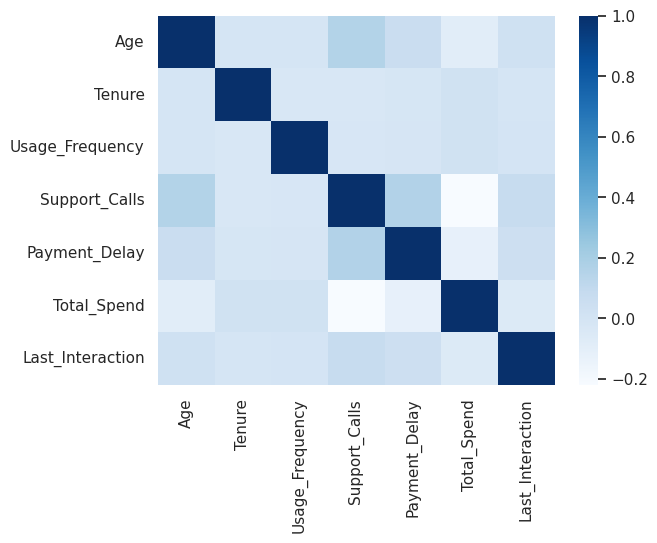

In [ ]:
corr = df1[numerical_features].corr()
sns.heatmap(corr, cmap='Blues')

## Splitting of data into Independent and Dependent features

In [ ]:
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [ ]:
print(f"Training dataset shape, X_train: {X_train.shape}, y_train: {y_train.shape}")

Training dataset shape, X_train: (308582, 12), y_train: (308582,)


In [ ]:
print(f"Testing dataset shape, X_test: {X_test.shape}, y_test: {y_test.shape}")

Testing dataset shape, X_test: (132250, 12), y_test: (132250,)


In [ ]:
X_train.head()

,Age,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Total_Spend,Last_Interaction,Gender_Male,Subscription_Type_Premium,Subscription_Type_Standard,Contract_Length_Monthly,Contract_Length_Quarterly
118311,1.979275,-0.130759,1.303541,1.105969,1.093996,-0.833114,1.456357,0,1,0,0,1
99593,0.050380,0.216952,-0.676373,0.128839,0.730714,-1.954364,1.340026,0,0,0,0,0
233797,0.291492,-1.231844,0.488282,2.083100,1.093996,0.337886,0.758374,0,0,1,1,0
406431,0.532604,1.144182,1.420007,0.128839,-0.359131,-0.150232,0.060391,1,0,1,0,1
138508,1.255940,-0.594374,1.070610,0.780259,0.125245,-0.289101,1.223696,1,0,0,1,0


In [ ]:
y_train

,Churn
118311,1.0
99593,1.0
233797,1.0
406431,0.0
138508,1.0
...,...
259179,0.0
365839,0.0
131932,1.0
146867,1.0


## Logistic Regression

In [ ]:
model_1 = LogisticRegression()

model_1.fit(X_train, y_train)

y_pred = model_1.predict(X_test)

In [ ]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
cm=confusion_matrix(y_test, y_pred)
classification_report_ = classification_report(y_test, y_pred)



In [ ]:
print("Accuracy :",accuracy)
print("Precision :",precision)
print("Recall :",recall)
print("F1 Score :",f1)
print("ROC AUC Score :",roc_auc)
print("----------------------------------------------------------------------------")
print(cm)
print("----------------------------------------------------------------------------")
print(classification_report_)


Accuracy : 0.8958487712665406
Precision : 0.9267301375201826
Recall : 0.8866693301371688
F1 Score : 0.9062572311377898
ROC AUC Score : 0.8972884789244275
----------------------------------------------------------------------------
[[51896  5264]
 [ 8510 66580]]
----------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88     57160
         1.0       0.93      0.89      0.91     75090

    accuracy                           0.90    132250
   macro avg       0.89      0.90      0.89    132250
weighted avg       0.90      0.90      0.90    132250



## K-Nearest Neighbors (KNN)

In [ ]:
model_2 = KNeighborsClassifier()
model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
cm=confusion_matrix(y_test, y_pred)
classification_report_ = classification_report(y_test, y_pred)

In [ ]:
print("Accuracy :",accuracy)
print("Precision :",precision)
print("Recall :",recall)
print("F1 Score :",f1)
print("ROC AUC Score :",roc_auc)
print("----------------------------------------------------------------------------")
print(cm)
print("----------------------------------------------------------------------------")
print(classification_report_)

Accuracy : 0.9579357277882797
Precision : 0.9981800203493788
Recall : 0.9276068717538953
F1 Score : 0.9616003202849431
ROC AUC Score : 0.9626925191519652
----------------------------------------------------------------------------
[[57033   127]
 [ 5436 69654]]
----------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     57160
         1.0       1.00      0.93      0.96     75090

    accuracy                           0.96    132250
   macro avg       0.96      0.96      0.96    132250
weighted avg       0.96      0.96      0.96    132250



## RandomForestClassifier

In [ ]:
model_3 = RandomForestClassifier()
model_3.fit(X_train, y_train)
y_pred = model_3.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
cm=confusion_matrix(y_test, y_pred)
classification_report_ = classification_report(y_test, y_pred)

In [ ]:
print("Accuracy :",accuracy)
print("Precision :",precision)
print("Recall :",recall)
print("F1 Score :",f1)
print("ROC AUC Score :",roc_auc)
print("----------------------------------------------------------------------------")
print(cm)
print("----------------------------------------------------------------------------")
print(classification_report_)

Accuracy : 0.9994631379962193
Precision : 0.9999733415086041
Recall : 0.9990811026767878
F1 Score : 0.9995270229760247
ROC AUC Score : 0.9995230565868194
----------------------------------------------------------------------------
[[57158     2]
 [   69 75021]]
----------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     57160
         1.0       1.00      1.00      1.00     75090

    accuracy                           1.00    132250
   macro avg       1.00      1.00      1.00    132250
weighted avg       1.00      1.00      1.00    132250



## DecisionTreeClassifier

In [ ]:
model_4 = DecisionTreeClassifier()
model_4.fit(X_train, y_train)
y_pred = model_4.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
cm=confusion_matrix(y_test, y_pred)
classification_report_ = classification_report(y_test, y_pred)

In [ ]:
print("Accuracy :",accuracy)
print("Precision :",precision)
print("Recall :",recall)
print("F1 Score :",f1)
print("ROC AUC Score :",roc_auc)
print("----------------------------------------------------------------------------")
print(cm)
print("----------------------------------------------------------------------------")
print(classification_report_)

Accuracy : 0.9997958412098299
Precision : 0.999880129460183
Recall : 0.9997602876548142
F1 Score : 0.9998202049663384
ROC AUC Score : 0.9998014174453217
----------------------------------------------------------------------------
[[57151     9]
 [   18 75072]]
----------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     57160
         1.0       1.00      1.00      1.00     75090

    accuracy                           1.00    132250
   macro avg       1.00      1.00      1.00    132250
weighted avg       1.00      1.00      1.00    132250



## GradientBoostingClassifier

In [ ]:
model_5 = GradientBoostingClassifier()
model_5.fit(X_train, y_train)
y_pred = model_5.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
cm=confusion_matrix(y_test, y_pred)
classification_report_ = classification_report(y_test, y_pred)

In [ ]:
print("Accuracy :",accuracy)
print("Precision :",precision)
print("Recall :",recall)
print("F1 Score :",f1)
print("ROC AUC Score :",roc_auc)
print("----------------------------------------------------------------------------")
print(cm)
print("----------------------------------------------------------------------------")
print(classification_report_)

Accuracy : 0.9965519848771267
Precision : 0.9999732039979635
Recall : 0.9939539219603143
F1 Score : 0.9969544774524471
ROC AUC Score : 0.9969594662285826
----------------------------------------------------------------------------
[[57158     2]
 [  454 74636]]
----------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     57160
         1.0       1.00      0.99      1.00     75090

    accuracy                           1.00    132250
   macro avg       1.00      1.00      1.00    132250
weighted avg       1.00      1.00      1.00    132250



## SVC

In [ ]:
model_6= SVC()
model_6.fit(X_train, y_train)
y_pred = model_6.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
cm=confusion_matrix(y_test, y_pred)
classification_report_ = classification_report(y_test, y_pred)

In [ ]:
print("Accuracy :",accuracy)
print("Precision :",precision)
print("Recall :",recall)
print("F1 Score :",f1)
print("ROC AUC Score :",roc_auc)
print("----------------------------------------------------------------------------")
print(cm)
print("----------------------------------------------------------------------------")
print(classification_report_)

Accuracy : 0.9813988657844991
Precision : 0.997697557766631
Recall : 0.9694766280463444
F1 Score : 0.9833846652617928
ROC AUC Score : 0.9832687548909119
----------------------------------------------------------------------------
[[56992   168]
 [ 2292 72798]]
----------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     57160
         1.0       1.00      0.97      0.98     75090

    accuracy                           0.98    132250
   macro avg       0.98      0.98      0.98    132250
weighted avg       0.98      0.98      0.98    132250



## Naive Bayes Classifier

In [ ]:
model_7= GaussianNB()
model_7.fit(X_train, y_train)
y_pred = model_7.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
cm=confusion_matrix(y_test, y_pred)
classification_report_ = classification_report(y_test, y_pred)

In [ ]:
print("Accuracy :",accuracy)
print("Precision :",precision)
print("Recall :",recall)
print("F1 Score :",f1)
print("ROC AUC Score :",roc_auc)
print("----------------------------------------------------------------------------")
print(cm)
print("----------------------------------------------------------------------------")
print(classification_report_)

Accuracy : 0.7683856332703214
Precision : 1.0
Recall : 0.592076175256359
F1 Score : 0.7437787016202562
ROC AUC Score : 0.7960380876281795
----------------------------------------------------------------------------
[[57160     0]
 [30631 44459]]
----------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.65      1.00      0.79     57160
         1.0       1.00      0.59      0.74     75090

    accuracy                           0.77    132250
   macro avg       0.83      0.80      0.77    132250
weighted avg       0.85      0.77      0.76    132250

